# Analiza koncentracije polena u vazduhu u Srbiji

U ovom projektu analiziram koncentracije polena u dobijene na 27 mernih mesta u Srbiji u periodu od 2016 do 2019 godine. Podaci su preuzeti sa sajta https://data.gov.rs i obezbedila ih je Agencija za zaštitu životne sredine.

Kada se govori o "koncentraciji polena", misli se na broj polenskih zrna detektovanih po kubnom metru vazduha. 

Cilj je dobiti odgovore na pitanja poput:

- U kojim delovima godine su koncentracije alergena najviše, a u kojima najniže?
- U kojim delovima godine su najviše koncentracije visoko alergenih polena?
- Da li se izmerene koncentracije polena poklapaju sa zvaničnim kalendarima cvetanja?
- U kojim gradovima su najviše i najniže koncentracije polena?

In [1]:
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
allergen_types = requests.get('http://polen.sepa.gov.rs/api/opendata/allergen-types/')
allergens = requests.get('http://polen.sepa.gov.rs/api/opendata/allergens/')
locations = requests.get('http://polen.sepa.gov.rs/api/opendata/locations/')
pollens = requests.get('http://polen.sepa.gov.rs/api/opendata/pollens/')
con = requests.get('http://polen.sepa.gov.rs/api/opendata/concentrations')

In [3]:
allergen_types_json = allergen_types.json()

In [4]:
allergens_json = allergens.json()

In [5]:
locations_json = locations.json()

In [6]:
pollens_json = pollens.json()

Zbog velikog broja stranica, podaci iz tabela pollens i concentrations su preuzeti sa API servera i sačuvani kao csv fajl:

In [7]:
#pollens_json_all = list()
#pollens_json_all = pollens_json_all + pollens_json['results']

In [8]:
#while pollens_json['next'] is not None:
   # print ('Another page found', pollens_json['next'])
    #response = requests.get(pollens_json['next'])
   # pollens_json = response.json()
    #pollens_json_all = pollens_json_all + pollens_json['results']

In [9]:
#pollens_df = pd.DataFrame.from_dict(json_normalize(pollens_json_all), orient='columns')

In [10]:
#export_pollens = pollens_df.to_csv('pollens.csv')

In [11]:
pollens_df = pd.read_csv('pollens.csv')

In [12]:
pollens_df.head(20)

,Unnamed: 0,concentrations,date,id,location
0,0,"[3002, 3003, 3004, 3005]",2016-02-01,539,12
1,1,"[4649, 4650, 4651]",2016-02-01,805,3
2,2,"[6126, 6127, 6128]",2016-02-01,1078,4
3,3,[],2016-02-01,1351,20
4,4,[],2016-02-01,1624,5
5,5,"[10767, 10768]",2016-02-01,1897,10
6,6,"[12370, 12371, 12372]",2016-02-01,2170,14
7,7,"[15518, 15519]",2016-02-01,2686,13
8,8,"[17422, 17423, 17424, 17425]",2016-02-01,2965,17
9,9,"[19339, 19340]",2016-02-01,3238,9


In [13]:
#con_json = con.json()

In [14]:
#con_json_all = list()
#con_json_all = con_json_all + con_json['results']

In [15]:
#while con_json['next'] is not None:
  #  print ('Another page found', con_json['next'])
   # response = requests.get(con_json['next'])
   # con_json = response.json()
    #con_json_all = con_json_all + con_json['results']

In [16]:
#con_df = pd.DataFrame.from_dict(json_normalize(con_json_all), orient='columns')

In [17]:
con_df = pd.read_csv('conc.csv')

In [18]:
con_df.head()

,Unnamed: 0,allergen,id,pollen,value
0,0,1,12688,2231,19
1,1,1,16255,2771,1
2,2,1,11233,1966,126
3,3,1,12679,2230,24
4,4,1,15767,2729,1


In [19]:
#export_con = con_df.to_csv('conc.csv')

In [20]:
allergen_types_df = pd.DataFrame.from_dict(json_normalize(allergen_types_json), orient='columns')

In [21]:
allergen_types_df

,id,name
0,1,Дрвеће
1,3,Корови
2,2,Траве


In [22]:
allergens_df = pd.DataFrame.from_dict(json_normalize(allergens_json), orient='columns')

In [23]:
allergens_df

,allergenicity,allergenicity_display,id,localized_name,margine_bottom,margine_top,name,type
0,1,mild,1,ЈАВОР,60,100,ACER,1
1,3,high,2,ЈОВА,60,100,ALNUS,1
2,3,high,3,АМБРОЗИЈА,30,100,AMBROSIA,3
3,2,moderate,4,ПЕЛИН,60,100,ARTEMISIA,3
4,3,high,5,БРЕЗА,60,100,BETULA,1
5,1,mild,6,КОНОПЉЕ,60,100,CANNABACEAE,3
6,1,mild,7,ГРАБ,60,100,CARPINUS,1
7,1,mild,26,КОПРИВИЋ,60,100,CELTIS,1
8,2,moderate,8,ШТИРЕВИ/ПЕПЕЉУГЕ,60,100,CHENOP/AMAR.,3
9,2,moderate,9,ЛЕСКА,60,100,CORYLUS,1


In [24]:
locations_df = pd.DataFrame.from_dict(json_normalize(locations_json), orient='columns')

In [25]:
locations_df

,description,id,latitude,longitude,name
0,,2,44.800000,20.466670,БЕОГРАД (ЗВЕЗДАРА) - ЗЕЛЕНО БРДО
1,,1,44.818610,20.468060,БЕОГРАД - НОВИ БЕОГРАД
2,,17,45.625130,20.052790,БЕЧЕЈ
3,,27,0.000000,0.000000,ВАЉЕВО
4,,8,42.551390,21.900280,ВРАЊЕ
5,,25,0.000000,0.000000,ВРБАС
6,Подаци о установи у којој се обављају мерења а...,9,45.116670,21.303610,ВРШАЦ
7,,10,43.904170,22.284720,ЗАЈЕЧАР
8,,16,43.721720,19.700970,ЗЛАТИБОР
9,,26,0.000000,0.000000,ЗРЕЊАНИН


Podaci su preuzeti kao JSON fajl, a zatim konvertovani u pandas dataframe, radi lakše manipulacije i vizuelizacije. Dobijene su četiri tabele, koje je potrebno očistiti i zatim spojiti.

## Čišćenje podataka

In [26]:
cirilica = ['А', 'Б', 'В', 'Г', 'Д', 'Ђ', 'Е', 'Ж', 'З', 'И', 'Ј', 'К', 'Л','Љ', "М", "Н", "Њ", 'О', 'П', 'Р', 'С', 'Т', 'Ћ', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Џ', 'Ш']
latinica = ['a', 'b', 'v', 'g', 'd', 'đ', 'e', 'ž', 'z', 'i', 'j', 'k', 'l', 'lj', 'm', 'n', 'nj', 'o', 'p', 'r', 's', 't', 'ć', 'u', 'f', 'h', 'c', 'č', 'dž', 'š']
recnik_slova = {}
for i, cir in enumerate(cirilica):
    lat = latinica[i]
    recnik_slova[cir] = lat

In [27]:
def cir_to_lat(string):
    list1=[]
    for s in string.upper():
        if s in recnik_slova:
            list1.append(recnik_slova[s])
        else: list1.append(s.lower())
    return ''.join(list1)

In [28]:
allergen_types_df['name'] = allergen_types_df['name'].apply(cir_to_lat)

In [29]:
allergen_types_df

,id,name
0,1,drveće
1,3,korovi
2,2,trave


In [30]:
allergens_df['localized_name'] = allergens_df['localized_name'].apply(cir_to_lat)

In [31]:
allergens_df

,allergenicity,allergenicity_display,id,localized_name,margine_bottom,margine_top,name,type
0,1,mild,1,javor,60,100,ACER,1
1,3,high,2,jova,60,100,ALNUS,1
2,3,high,3,ambrozija,30,100,AMBROSIA,3
3,2,moderate,4,pelin,60,100,ARTEMISIA,3
4,3,high,5,breza,60,100,BETULA,1
5,1,mild,6,konoplje,60,100,CANNABACEAE,3
6,1,mild,7,grab,60,100,CARPINUS,1
7,1,mild,26,koprivić,60,100,CELTIS,1
8,2,moderate,8,štirevi/pepeljuge,60,100,CHENOP/AMAR.,3
9,2,moderate,9,leska,60,100,CORYLUS,1


In [32]:
allergens_df['name'] = allergens_df['name'].apply(lambda s: s.lower())

In [33]:
locations_df = locations_df.drop(columns=['description'])

In [34]:
locations_df['name'] = locations_df['name'].apply(cir_to_lat)

In [35]:
locations_df['latitude'] = locations_df['latitude'].astype(float)
locations_df['longitude'] = locations_df['longitude'].astype(float)

In [36]:
pd.options.mode.chained_assignment = None

Neka merna mesta nisu imala podatke o geografskoj širini i dužini:

In [37]:
locations_df['latitude'][3] = 44.27596
locations_df['longitude'][3] = 19.91217
locations_df['latitude'][5] = 45.57329
locations_df['longitude'][5] = 19.65409
locations_df['latitude'][9] = 45.39890
locations_df['longitude'][9] = 20.37644
locations_df['latitude'][10] = 45.84249
locations_df['longitude'][10] = 20.46425
locations_df['latitude'][18] = 45.32188
locations_df['longitude'][18] = 19.82978
locations_df['latitude'][23] = 45.76725
locations_df['longitude'][23] = 19.14311
locations_df['latitude'][24] = 45.00965
locations_df['longitude'][24] = 19.55489

In [38]:
locations_df

,id,latitude,longitude,name
0,2,44.80000,20.46667,beograd (zvezdara) - zeleno brdo
1,1,44.81861,20.46806,beograd - novi beograd
2,17,45.62513,20.05279,bečej
3,27,44.27596,19.91217,valjevo
4,8,42.55139,21.90028,vranje
5,25,45.57329,19.65409,vrbas
6,9,45.11667,21.30361,vršac
7,10,43.90417,22.28472,zaječar
8,16,43.72172,19.70097,zlatibor
9,26,45.39890,20.37644,zrenjanin


In [39]:
con_df.head()

,Unnamed: 0,allergen,id,pollen,value
0,0,1,12688,2231,19
1,1,1,16255,2771,1
2,2,1,11233,1966,126
3,3,1,12679,2230,24
4,4,1,15767,2729,1


In [40]:
pollens_df

,Unnamed: 0,concentrations,date,id,location
0,0,"[3002, 3003, 3004, 3005]",2016-02-01,539,12
1,1,"[4649, 4650, 4651]",2016-02-01,805,3
2,2,"[6126, 6127, 6128]",2016-02-01,1078,4
3,3,[],2016-02-01,1351,20
4,4,[],2016-02-01,1624,5
5,5,"[10767, 10768]",2016-02-01,1897,10
6,6,"[12370, 12371, 12372]",2016-02-01,2170,14
7,7,"[15518, 15519]",2016-02-01,2686,13
8,8,"[17422, 17423, 17424, 17425]",2016-02-01,2965,17
9,9,"[19339, 19340]",2016-02-01,3238,9


In [41]:
con_df = con_df.drop(columns=['Unnamed: 0'])

In [42]:
pollens_df = pollens_df.drop(columns=['Unnamed: 0'])

In [43]:
def print_tables(l):
    for df in l:
        print(df.head(), '\n')

In [44]:
list = [allergen_types_df,
       allergens_df,
       locations_df,
       pollens_df,
       con_df]

In [45]:
print_tables(list)

   id    name
0   1  drveće
1   3  korovi
2   2   trave 

   allergenicity allergenicity_display  id localized_name  margine_bottom  \
0              1                  mild   1          javor              60   
1              3                  high   2           jova              60   
2              3                  high   3      ambrozija              30   
3              2              moderate   4          pelin              60   
4              3                  high   5          breza              60   

   margine_top       name  type  
0          100       acer     1  
1          100      alnus     1  
2          100   ambrosia     3  
3          100  artemisia     3  
4          100     betula     1   

   id  latitude  longitude                              name
0   2  44.80000   20.46667  beograd (zvezdara) - zeleno brdo
1   1  44.81861   20.46806            beograd - novi beograd
2  17  45.62513   20.05279                             bečej
3  27  44.27596   19.91217   

In [46]:
con_df = con_df.drop_duplicates()

In [47]:
pollens_df = pollens_df.drop_duplicates()

In [48]:
pollens_df = pollens_df.drop(pollens_df[pollens_df['concentrations']=='[]'].index)

In [49]:
def to_time(s):
    s = dt.strptime(s, '%Y-%m-%d')
    return s

In [50]:
pollens_df['date'] = pollens_df['date'].apply(to_time)

In [51]:
def ukloni_zagrade(s):
    s = s.replace('[', '').replace(']', '')
    return s

In [52]:
pollens_df['concentrations'] = pollens_df['concentrations'].apply(ukloni_zagrade)

In [53]:
lst_col = 'concentrations' 

x = pollens_df.assign(**{lst_col:pollens_df[lst_col].str.split(',')})

In [54]:
pollens_df = pd.DataFrame({
          col:np.repeat(x[col].values, x[lst_col].str.len())
          for col in x.columns.difference([lst_col])
      }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

In [55]:
pollens_df['concentrations'] = pollens_df['concentrations'].astype(int)

## Spajanje tabela

In [56]:
pc_merged = pd.merge(left = pollens_df, right = con_df, left_on ='concentrations', right_on = 'id')

Nakon spajanja, izgubljeno je oko 36% redova, jer za njih ne postoje izmerene koncentracije. Najviše izgubljenih podataka je za Valjevo.

In [57]:
pc_merged = pc_merged.drop(columns=['id_y'])

In [58]:
pc_merged = pc_merged.rename(columns={'id_x':'id_con'})

In [59]:
pc_merged = pd.merge(left = pc_merged, right = locations_df, left_on ='location', right_on = 'id')

In [60]:
pc_merged = pc_merged.rename(columns={'id':'id_loc', 'name':'mesto'})

In [61]:
pc_merged = pd.merge(left = pc_merged, right = allergens_df, left_on ='allergen', right_on = 'id')

In [62]:
pc_merged = pc_merged.rename(columns={'id':'id_allergen', 'name':'allergen_name'})

In [63]:
pc_merged = pd.merge(left = pc_merged, right = allergen_types_df, left_on ='type', right_on = 'id')

In [64]:
pc_merged = pc_merged.drop(columns=['id'])

In [65]:
pc_merged = pc_merged.drop(columns=['id_con', 'id_loc', 'id_allergen'])

In [66]:
pc_merged

,concentrations,date,location,allergen,pollen,value,latitude,longitude,mesto,allergenicity,allergenicity_display,localized_name,margine_bottom,margine_top,allergen_name,type,name
0,3002,2016-02-01,12,9,539,5,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
1,3006,2016-02-02,12,9,540,5,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
2,3010,2016-02-03,12,9,541,9,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
3,3013,2016-02-04,12,9,542,1,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
4,3014,2016-02-05,12,9,543,1,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
5,3015,2016-02-06,12,9,544,8,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
6,3017,2016-02-07,12,9,545,12,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
7,3021,2016-02-08,12,9,546,21,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
8,3026,2016-02-09,12,9,547,14,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće
9,3031,2016-02-10,12,9,548,8,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće


# Kategorizacija izmerenih koncentracija

Za kategorizaciju koristićemo vrednosti polena u vazduhu koje se mogu naći na sajtu Američke akademije za alergije, astmu i imunologiju - https://www.aaaai.org/global/nab-pollen-counts/reading-the-charts . Kategorizacija zavisi od tipa alegena i deli koncentraciju polena u pet kategorija: absent, low, moderate, high i very high.

In [67]:
def categorise(row):
    if row['type'] == 1:
        if row['value'] == 0:
            level = 'absent'
        elif 0 < row['value'] <= 14:
                level = 'low'
        elif 14 < row['value'] <= 89:
                level = 'moderate'
        elif 89 < row['value'] <= 1499:
                level = 'high'
        elif row['value'] > 1499:
                level = 'very high'
    elif row['type'] == 2:
        if row['value'] == 0:
            level = 'absent'
        elif 0 < row['value'] <= 4:
                level = 'low'
        elif 4 < row['value'] <= 19:
                level = 'moderate'
        elif 19 < row['value'] <= 199:
                level = 'high'
        elif row['value'] > 199:
                level = 'very high'
    elif row['type'] == 3:
        if row['value'] == 0:
            level = 'absent'
        elif 0 < row['value'] <= 9:
                level = 'low'
        elif 9 < row['value'] <= 49:
                level = 'moderate'
        elif 49 < row['value'] <= 499:
                level = 'high'
        elif row['value'] > 499:
                level = 'very high'
    return level

In [68]:
pc_merged['level'] = pc_merged.apply(categorise, axis = 1)

In [69]:
pc_merged['level'].value_counts()

absent       169382
low           61674
moderate      21497
high           9661
very high       182
Name: level, dtype: int64

Konačna tabela:

In [70]:
pc_merged.head()

,concentrations,date,location,allergen,pollen,value,latitude,longitude,mesto,allergenicity,allergenicity_display,localized_name,margine_bottom,margine_top,allergen_name,type,name,level
0,3002,2016-02-01,12,9,539,5,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,low
1,3006,2016-02-02,12,9,540,5,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,low
2,3010,2016-02-03,12,9,541,9,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,low
3,3013,2016-02-04,12,9,542,1,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,low
4,3014,2016-02-05,12,9,543,1,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,low


## Analiza podataka

In [71]:
pollen_mean = pc_merged.groupby('date')['value'].mean()

In [72]:
%matplotlib inline

<Figure size 432x288 with 0 Axes>

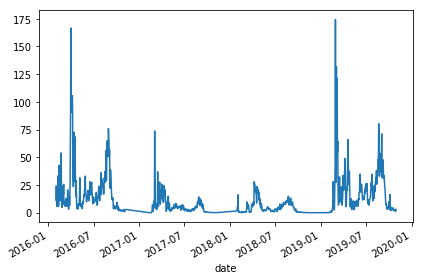

In [73]:
fig = plt.figure()
fig, ax = plt.subplots()
pollen_mean.plot()
fig.tight_layout()

plt.show()

In [74]:
pc_zeroes = pc_merged[pc_merged['value'] == 0]
pc_zeroes_grouped = pc_zeroes.groupby('date')['date'].count()

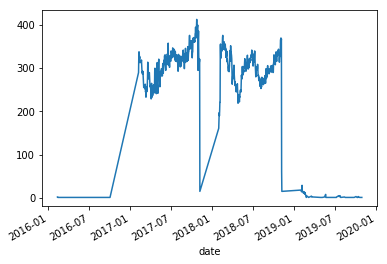

In [75]:
pc_zeroes_grouped.plot()

Nakon grafičkog prikaza koncentracija polena, primećen je veliki broj podataka za vrednostima 0 u 2017 i 2018 godini:

In [76]:
pc_zeroes

,concentrations,date,location,allergen,pollen,value,latitude,longitude,mesto,allergenicity,allergenicity_display,localized_name,margine_bottom,margine_top,allergen_name,type,name,level
33,47383,2017-02-10,12,9,6886,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
34,47408,2017-02-11,12,9,6887,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
35,47433,2017-02-12,12,9,6888,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
38,47508,2017-02-15,12,9,6891,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
39,47533,2017-02-16,12,9,6892,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
59,48333,2017-03-20,12,9,6924,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
60,48358,2017-03-21,12,9,6925,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
61,48383,2017-03-22,12,9,6926,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
62,48408,2017-03-23,12,9,6927,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent
63,48433,2017-03-24,12,9,6928,0,43.72583,20.68944,kraljevo,2,moderate,leska,60,100,corylus,1,drveće,absent


169382 reda ima vrednost koncentracije polena 0. Većina je u godinama 2017 i 2018.

In [77]:
years = [2016, 2017, 2018, 2019]
for y in years:
    zero_count = pc_merged[(pc_merged['date'].dt.year == y)&(pc_merged['value']==0)].shape[0]
    length = pc_merged[pc_merged['date'].dt.year == y].shape[0]
    zero_perc = (zero_count/length)*100
    print(y, ':', zero_count, '-', zero_perc,'%')

2016 : 15 - 0.06322178201129564 %
2017 : 84865 - 77.7351335507273 %
2018 : 84107 - 80.25247368873029 %
2019 : 395 - 1.599514071674428 %


Oko 80% izmerenih koncentracija polena u godinama 2017 i 2018 ima vrednosti 0, dok je za 2016. godinu taj broj praktično 0%. Nakon ponovne provere, zaključak da su podaci na API serveru zaista ovakvi. Očigledno je reč o grešci. Odluka je da se podaci sa vrednostima 0 za ove dve godine uklone.

In [78]:
zeroes1718 = pc_merged[((pc_merged['date'].dt.year == 2017)|(pc_merged['date'].dt.year == 2018))&(pc_merged['value']==0)]

In [79]:
pc_merged = pc_merged.drop(zeroes1718.index)

In [80]:
pollen2016 = pc_merged[pc_merged['date'].dt.year == 2016]
means_2016 = pollen2016.groupby('date')['value'].mean()

In [81]:
pollen2019 = pc_merged[pc_merged['date'].dt.year == 2019]
means_2019 = pollen2019.groupby('date')['value'].mean()

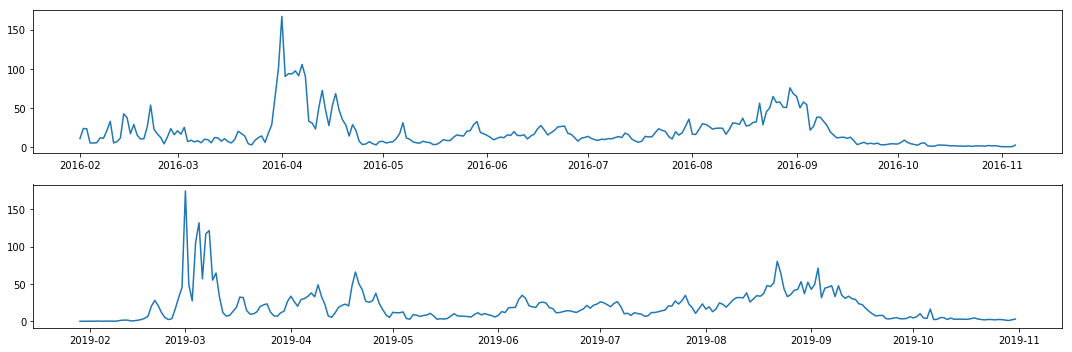

In [82]:
fig, axs = plt.subplots(2, figsize=(15,5))

axs[0].plot(means_2016)
axs[1].plot(means_2019)

fig.tight_layout()

Posmatrajući grafike, možemo zaključiti da u toku godine postoje dva perioda u kojim su koncentracije polena u vazduhu najviše: od početka marta do kraja aprila (što je logično, jer je u tom periodu najintenzivnije cvetanje većine biljaka) i od početka augusta do kraja prve polovine septembra kada po kalendarima cvetanja cvetaju korovi poput ambrozije.

In [83]:
def same_year(date):
    if date.year!=2016:
        date = date.replace(year = 2016)
    return date

In [84]:
pc_merged['date_new'] = pc_merged['date'].apply(same_year)

In [85]:
year_mean = pc_merged.groupby('date_new')['value'].mean()

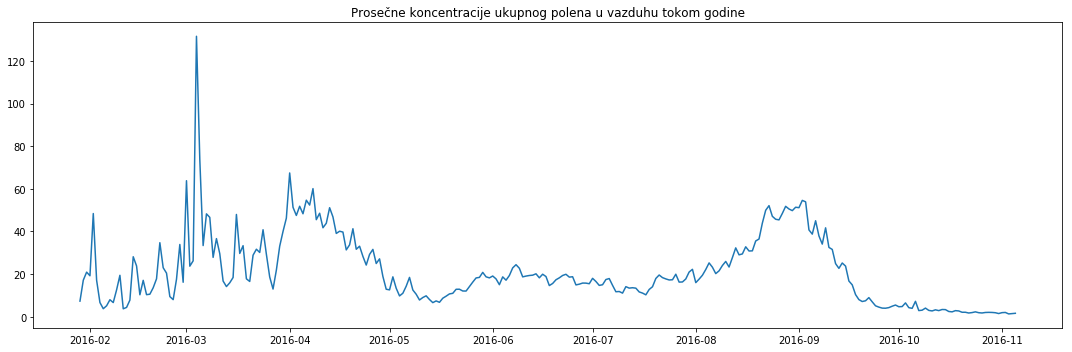

In [86]:
fig, axs = plt.subplots(1, figsize=(15,5))

axs.plot(year_mean)
plt.title('Prosečne koncentracije ukupnog polena u vazduhu tokom godine')

fig.tight_layout()

Meseci sa najvišim izmerenim prosečnim koncentracijama ukupnog polena:

In [87]:
 pc_merged.groupby(pd.Grouper(key='date', freq='m'))['value'].mean().sort_values(ascending=False)

date
2017-03-31    52.644350
2018-04-30    50.500801
2016-04-30    49.156704
2018-08-31    37.810410
2019-03-31    36.683934
2016-08-31    35.600963
2019-08-31    35.339104
2017-04-30    33.080439
2019-04-30    28.643489
2017-09-30    26.284021
2019-09-30    26.155625
2017-08-31    25.429706
2018-01-31    24.037736
2018-09-30    23.489183
2017-02-28    22.707753
2017-06-30    21.078178
2016-02-29    20.468266
2016-09-30    20.177570
2018-07-31    19.875101
2018-03-31    19.233129
2019-06-30    19.076145
2016-03-31    18.667603
2019-07-31    18.068210
2016-06-30    17.347023
2016-07-31    15.142800
2017-05-31    15.137607
2018-06-30    14.494541
2018-05-31    14.073080
2016-05-31    12.811487
2019-02-28    11.495215
2018-02-28    10.863825
2017-07-31     9.984161
2019-05-31     8.105404
2019-10-31     4.417500
2016-10-31     3.713563
2018-10-31     3.174179
2017-10-31     2.316606
2018-11-30     1.791045
2017-11-30     1.375000
2016-11-30     1.333333
2019-01-31     0.000000
2016-12-31 

Zbog toga što visoko alegeni poleni izazivaju najviše problema osobama kojima pate od alergijskog rinitisa i alergijske astme, pogledaćemo kada su najviše koncentracije ovih polena.

In [88]:
year_mean_high = pc_merged[pc_merged['allergenicity']==3].groupby('date_new')['value'].mean()

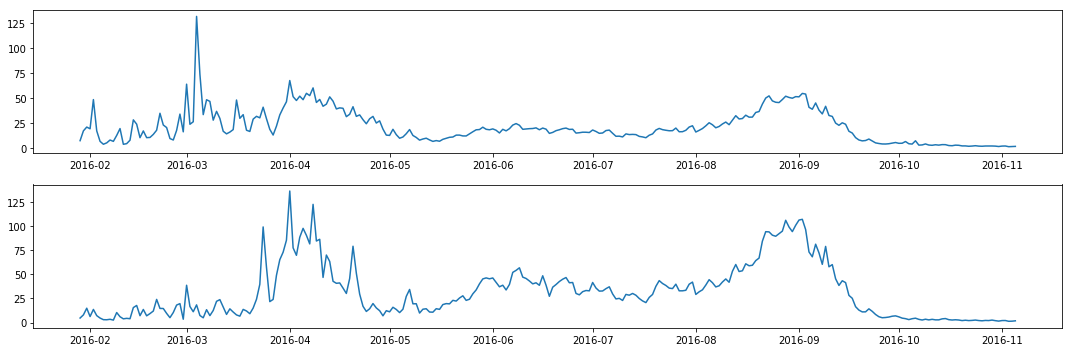

In [89]:
fig, axs = plt.subplots(2, figsize=(15,5))

axs[0].plot(year_mean)
axs[1].plot(year_mean_high)


fig.tight_layout()

Vidimo da se pikovi koncentracija visoko alegenih polena uglavnom poklapaju sa ukupnim koncentracijama.

Meseci sa najvišim izmerenim prosečnim koncentracijama visoko alergenih polena:

In [90]:
pc_merged[pc_merged['allergenicity']==3].groupby(pd.Grouper(key='date', freq='m'))['value'].mean().sort_values(ascending=False)

date
2018-08-31    78.997504
2016-04-30    73.879254
2018-04-30    67.135802
2016-08-31    66.151351
2019-08-31    61.122208
2017-06-30    51.791667
2017-08-31    48.006168
2017-09-30    46.604336
2017-03-31    46.303951
2019-09-30    45.873051
2018-09-30    45.631480
2016-06-30    41.941101
2018-07-31    41.226977
2019-04-30    40.790857
2019-06-30    37.869952
2019-07-31    37.219917
2016-09-30    33.953447
2016-07-31    31.214765
2017-05-31    29.162261
2018-06-30    28.275773
2018-05-31    26.158120
2016-05-31    26.140255
2017-04-30    22.225532
2016-03-31    21.252193
2017-07-31    20.586918
2018-03-31    18.626543
2019-03-31    18.605603
2019-02-28    14.754286
2018-01-31    14.150000
2016-02-29    12.183932
2017-02-28     9.267974
2019-05-31     7.698459
2018-02-28     4.782609
2018-10-31     4.172554
2019-10-31     3.253333
2016-10-31     2.947917
2017-10-31     2.522551
2018-11-30     1.957447
2017-11-30     1.521739
2016-11-30     1.333333
2019-01-31     0.000000
2016-12-31 

In [91]:
pc_merged['month'] = pc_merged['date'].apply(lambda x: x.month)

In [92]:
pollen_by_month = pc_merged.groupby('month')['value'].mean()

Prosečne koncentracije polena po mesecima:

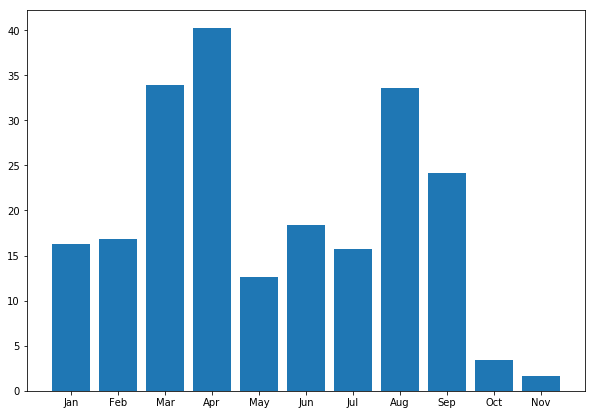

In [93]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(pollen_by_month.index, pollen_by_month)
plt.xticks(pollen_by_month.index, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'))
plt.show()

Koncentracije visoko alergenih polena po mesecima:

In [94]:
high_al_by_month = pc_merged[pc_merged['allergenicity']==3].groupby('month')['value'].mean()

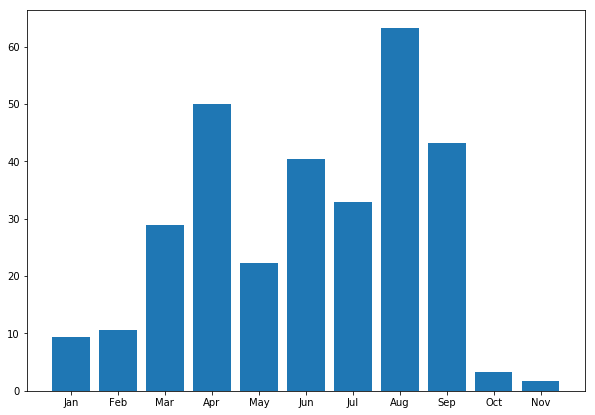

In [95]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(high_al_by_month.index, high_al_by_month)
plt.xticks(high_al_by_month.index, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'))
plt.show()

Koncentracija ukupnog polena je prosečno najviša u martu i aprilu, ali je prosečna koncentracija visoko alergenih polena najviša u avgustu.

Seledeće što nas zanima je u kojim mesecima su najviše koncentracije kojih alergena:

In [112]:
names = pc_merged['localized_name'].unique().tolist()
max_polen = {}
for polen in names:
    month = pc_merged[pc_merged['localized_name']==polen].groupby('month')['value'].mean().sort_values(ascending=False).index[0]
    max_polen[polen] = month

In [97]:
max_polen

{'leska': 1,
 'tisa/čempr.': 3,
 'jasen': 4,
 'četinari': 5,
 'javor': 4,
 'breza': 4,
 'brest': 6,
 'jova': 9,
 'topola': 3,
 'grab': 4,
 'vrba': 4,
 'hrast': 4,
 'orah': 4,
 'bukva': 4,
 'dud': 4,
 'platan': 4,
 'lipa': 3,
 'koprivić': 4,
 'trave': 6,
 'kiselice': 3,
 'konoplje': 8,
 'bokvica': 6,
 'štirevi/pepeljuge': 8,
 'kopriva': 7,
 'ambrozija': 8,
 'pelin': 8}

Dobijeni rezultati su uglavnom u skladu sa kalendarima cvetanja. Največe odstupanje je Jova, koja po kalendarima cveta u februaru i martu, ali merenja pokazuju najveće koncentracije u septembru.

In [98]:
jova_2017 = pc_merged[(pc_merged['localized_name']=='jova')&(pc_merged['date'].dt.year==2017)&((pc_merged['month']==8)|(pc_merged['month']==9))]

In [99]:
jova_2017

,concentrations,date,location,allergen,pollen,value,latitude,longitude,mesto,allergenicity,allergenicity_display,localized_name,margine_bottom,margine_top,allergen_name,type,name,level,date_new,month
71556,66001,2017-08-28,4,2,7631,117,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,high,2016-08-28,8
71557,66026,2017-08-29,4,2,7632,71,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,moderate,2016-08-29,8
71558,66051,2017-08-30,4,2,7633,43,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,moderate,2016-08-30,8
71559,66076,2017-08-31,4,2,7634,82,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,moderate,2016-08-31,8
71560,66101,2017-09-01,4,2,7635,112,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,high,2016-09-01,9
71561,66126,2017-09-02,4,2,7636,256,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,high,2016-09-02,9
71562,66151,2017-09-03,4,2,7637,131,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,high,2016-09-03,9
71563,66176,2017-09-04,4,2,7638,276,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,high,2016-09-04,9
71564,66201,2017-09-05,4,2,7639,212,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,high,2016-09-05,9
71565,66226,2017-09-06,4,2,7640,1043,44.03333,20.93333,kragujevac,3,high,jova,60,100,alnus,1,drveće,high,2016-09-06,9


Vidimo da je koncentracija polena jove u avgustu i septembru neobičajeno visoka za samo jedno merno mesto (Kragujevac) u jednoj godini (2017). 

In [100]:
pc_merged = pc_merged.drop(jova_2017.index)

In [113]:
max_polen

{'leska': 1,
 'tisa/čempr.': 3,
 'jasen': 4,
 'četinari': 5,
 'javor': 4,
 'breza': 4,
 'brest': 6,
 'jova': 1,
 'topola': 3,
 'grab': 4,
 'vrba': 4,
 'hrast': 4,
 'orah': 4,
 'bukva': 4,
 'dud': 4,
 'platan': 4,
 'lipa': 3,
 'koprivić': 4,
 'trave': 6,
 'kiselice': 3,
 'konoplje': 8,
 'bokvica': 6,
 'štirevi/pepeljuge': 8,
 'kopriva': 7,
 'ambrozija': 8,
 'pelin': 8}

Nakon uklanjanja ovih vrednosti, najveće koncentracije polena jove su u januaru.

In [102]:
ambrozija = pc_merged[pc_merged['localized_name']=='ambrozija'].groupby('date_new')['value'].mean()
trave = pc_merged[pc_merged['localized_name']=='trave'].groupby('date_new')['value'].mean()
jova = pc_merged[pc_merged['localized_name']=='jova'].groupby('date_new')['value'].mean()
breza = pc_merged[pc_merged['localized_name']=='breza'].groupby('date_new')['value'].mean()


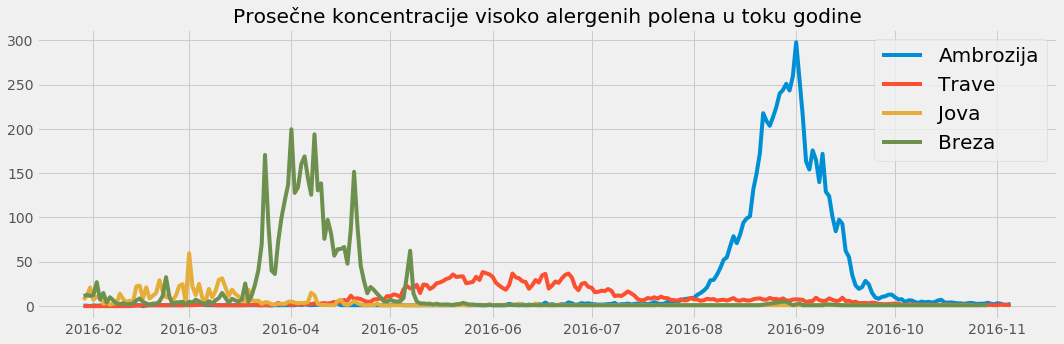

In [110]:
fig, axs = plt.subplots(1, figsize=(15,5))

p1 = plt.plot(ambrozija)
p2 = plt.plot(trave)
p3 = plt.plot(jova)
p4 = plt.plot(breza)

plt.title('Prosečne koncentracije visoko alergenih polena u toku godine')
plt.legend((p1[0], p2[0], p3[0], p4[0]),('Ambrozija', 'Trave', 'Jova', 'Breza'), prop={'size': 20})
plt.style.use('fivethirtyeight')

fig.tight_layout()

# Koncentracije polena prema mernim mestima

In [104]:
polen_mesta = pc_merged.groupby('mesto')['value'].mean().sort_values(ascending=True)

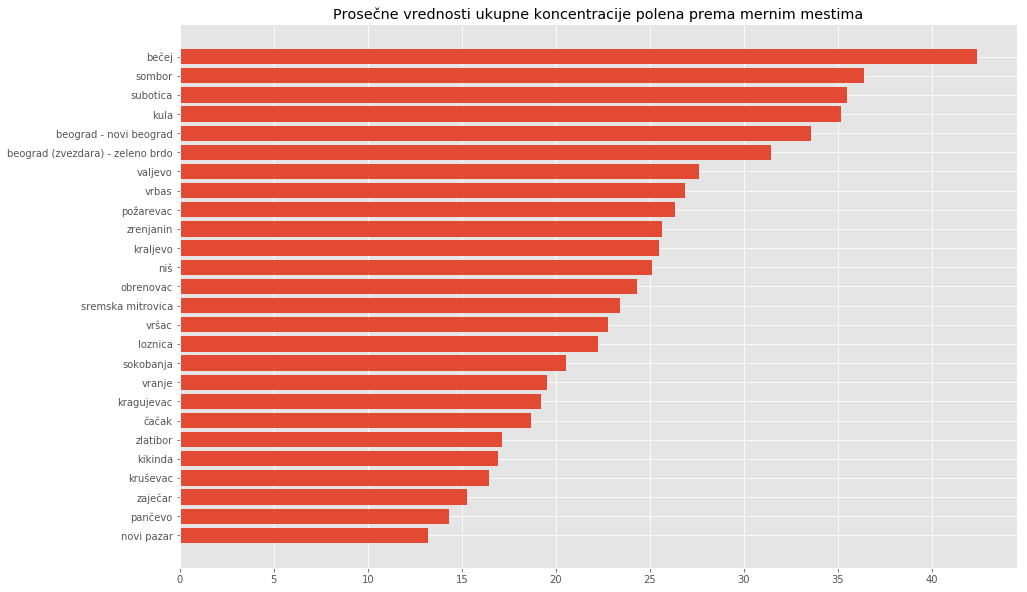

In [105]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(polen_mesta.index, polen_mesta)
plt.xticks()
plt.style.use('ggplot')
plt.title('Prosečne vrednosti ukupne koncentracije polena prema mernim mestima')
plt.show()

In [106]:
polen_va_mesta = pc_merged[pc_merged['allergenicity']==3].groupby('mesto')['value'].mean().sort_values(ascending=True)

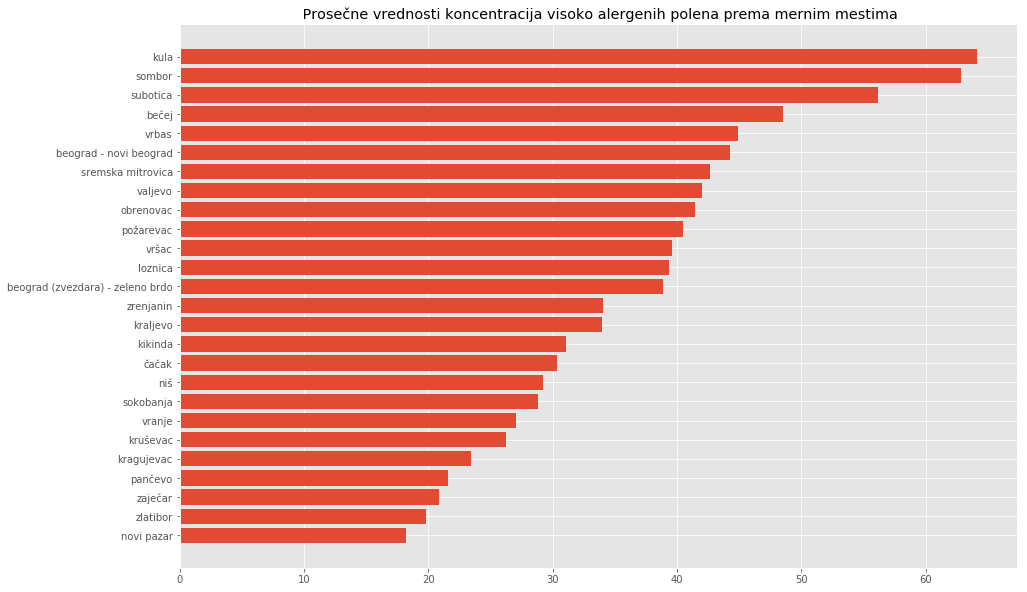

In [107]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(polen_va_mesta.index, polen_va_mesta)
plt.xticks()
plt.style.use('ggplot')
plt.title(' Prosečne vrednosti koncentracija visoko alergenih polena prema mernim mestima')
plt.show()